<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 4</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

## 1. Introducción

En este nootebook se presentan algunas funciones en `Julia` para encontrar las raíces de funciones utilizando el método de Newton y el método de biseción.

**Nota:** El código en el notebook utiliza las siguientes paqueterías de Julia: `PyPlot` y `SymPy`.

In [1]:
using PyPlot;
using SymPy;

## 2. Convergencia a la raíz real de $\:f(x)=x^{3}-x^{2}-x-1$

### Utilizando el método de Newton

Definición de la función:

In [2]:
function newtonroot(x0)
    
    listn=zeros(30)   # Se guarda espacio en la memoria para el vector que tendrá por entradas las aproximaciones a las raíces.
    x=x0;             # Condición inicial dada por el usuario.
    
    for i in 1:30
        f=x^3-x^2-x-1 # Función a la que se aproxima su raíz. Cada que se da la iteración se actualiza su valor a f(x).
        df=3x^2-2x-1  # Derivada de la función, se actualiza con cada iteración a f'(x).
        x=x-f/df      # Nueva aproximación de la raíz por el método de Newton.
        listn[i]=x    # Se guarda la aproximación x en el vector list y con cada iteración se cambia a la componente siguiente.
    end
    
    return listn
end;

Evaluación en cuatro condiciones iniciales distintas $x_{i}$, $i=1,2,3,4$:

In [3]:
x1=newtonroot(-20);
x2=newtonroot(0.5);  # Función newtonroot evaluada en
x3=newtonroot(-10);  # cuatro condiciones iniciales.
x4=newtonroot(10);

Gráfica de la convergencia de $x_{i}$ a la raíz de la función $\:f$:

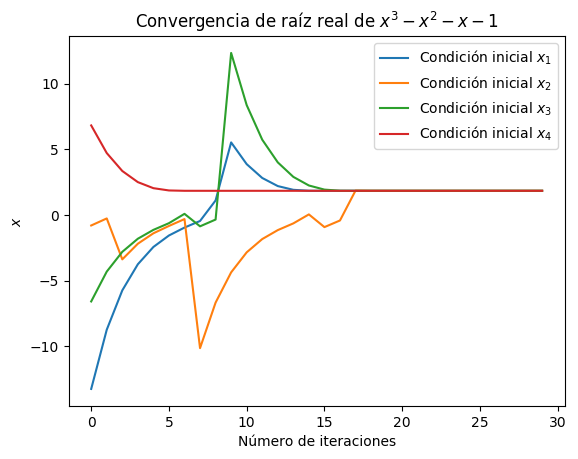

In [4]:
xlabel("Número de iteraciones")
ylabel(L"$x$")
title(L"Convergencia de raíz real de $x^{3}-x^{2}-x-1$")
plot(x1,label=L"Condición inicial $x_1$")
plot(x2,label=L"Condición inicial $x_2$")
plot(x3,label=L"Condición inicial $x_3$")
plot(x4,label=L"Condición inicial $x_4$")
legend();
show();

Utilizanción de  `SymPy` para hallar la raíz de $\:f$ y graficar el error relativo del método:

In [5]:
x=Sym("x");                  # Se asigna x como una variable simbólica de SymPy.
S=N(solve(x^3-x^2-x-1)[3]);  # Se encuentra el valor de la raíz de f. Como f es un polinomio de orden 3, tiene tres
                             # soluciones, de las cuales sólo una es real y corresponde a la tercera componente del vector
                             # solve, finalmente se pasa a un número con la función N.

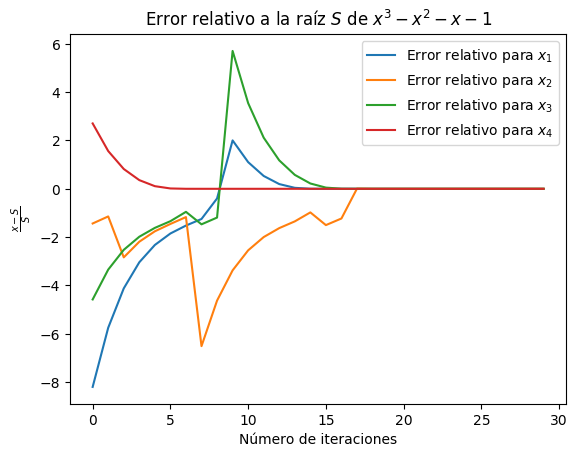

In [6]:
xlabel("Número de iteraciones")
ylabel(L"$\frac{x-S}{S}$")
title(L"Error relativo a la raíz $S$ de $x^{3}-x^{2}-x-1$")
plot((x1-S)/S,label=L"Error relativo para $x_1$")
plot((x2-S)/S,label=L"Error relativo para $x_2$")
plot((x3-S)/S,label=L"Error relativo para $x_3$")
plot((x4-S)/S,label=L"Error relativo para $x_4$")
legend();
show();

### Utilizando el método de bisección

Definición de la función:

In [7]:
function bisecroot(a,b)
    
    listb=zeros(30)      # Se guarda espacio en la memoria para el vector que tendrá por entradas las aproximaciones a las raíces.
    p=(a+b)/2            # Se calcula el primer valor de la serie p del método de bisección
    f(x)=x^3-x^2-x-1     # Función de la que se busca la raíz.
    
    for i in 1:30
        
        if f(a)*f(p)>0   # Se verifica si f(a)*f(p)>0, en tal caso el nuevo valor de la serie a es a=p,
            a=p          # en caso contario se deja a con el valor anterior de la serie.
        end
        
        if f(b)*f(p)>0   # Se verifica si f(b)*f(p)>0, en tal caso el nuevo valor de la serie b es b=p,
            b=p          # en caso contario se deja b con el valor anterior de la serie.
        end
        
        p=(a+b)/2        # Se calcula el nuevo valor de la serie p.
        listb[i]=p       # Se asigna el valor p a la i-ésima entrada del vector listb en la i-ésima iteración.
    end
    
    return listb
end;

Evaluación en cuatro intervalos _iniciales_ distintos $[a_{i},b_{i}]$, $i=1,2,3,4$:

In [8]:
x5=bisecroot(1,20);
x6=bisecroot(1,3);     # Función bisecroot evaluada en
x7=bisecroot(-10,10);  # cuatro intervalos iniciales.
x8=bisecroot(1,3.5);

Gráfica de la convergencia a la raíz de la función $\:f$ por el método de bisección y de su error relativo:

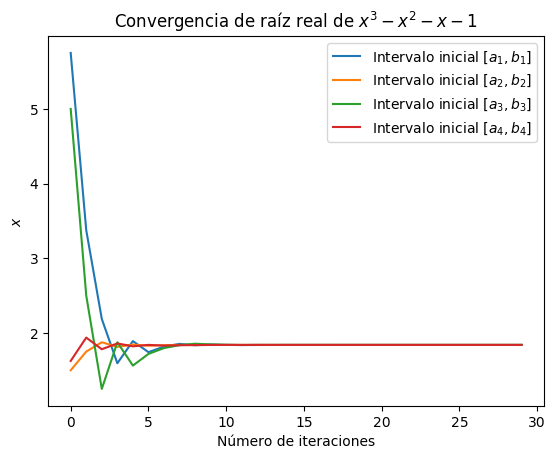

In [9]:
xlabel("Número de iteraciones")
ylabel(L"$x$")
title(L"Convergencia de raíz real de $x^{3}-x^{2}-x-1$")
plot(x5,label=L"Intervalo inicial $[a_1,b_1]$")
plot(x6,label=L"Intervalo inicial $[a_2,b_2]$")
plot(x7,label=L"Intervalo inicial $[a_3,b_3]$")
plot(x8,label=L"Intervalo inicial $[a_4,b_4]$")
legend();
show();

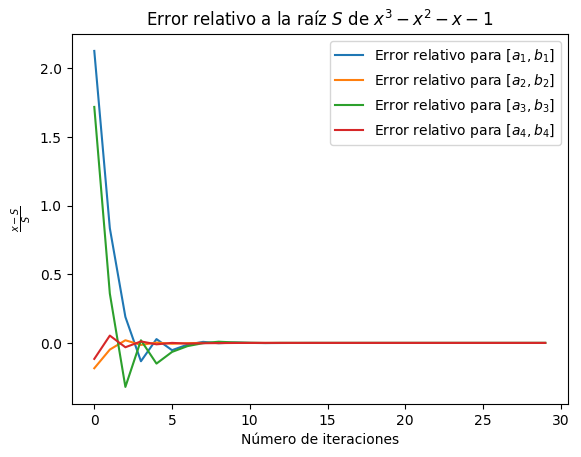

In [10]:
xlabel("Número de iteraciones")
ylabel(L"$\frac{x-S}{S}$")
title(L"Error relativo a la raíz $S$ de $x^{3}-x^{2}-x-1$")
plot((x5-S)/S,label=L"Error relativo para $[a_1,b_1]$")
plot((x6-S)/S,label=L"Error relativo para $[a_2,b_2]$")
plot((x7-S)/S,label=L"Error relativo para $[a_3,b_3]$")
plot((x8-S)/S,label=L"Error relativo para $[a_4,b_4]$")
legend();
show();

## 3. Convergencia a la raíz de una función arbitraria $\:f$

### Función con argumentos $\bigl(\:f,f',x_{0}\bigr)$

* Definición de la función que recibe una condición inicial $x_{0}$:

In [11]:
function metodo_newton(f,df,x0)
    
    x=Sym("x")              # Se asigna a x como variable simbólica.
    x=x0;                   # Condición inicial dada por el usuario.
    
    for i in 1:30
        x=x-f(x)/df(x)      # Nueva aproximación de la raíz dada por el método de Newton.
    end
    
    return x                # La salida de la función es la aproximación a la raíz de f.
end;

In [12]:
f(x)=sin(x);

In [13]:
df(x)=cos(x);

In [14]:
metodo_newton(f,df,7)

6.283185307179586

* Definición de la función que recibe varias condiciones iniciales:

In [15]:
function multi_newton(f,df,x0)
    
    x=Sym("x")              # Se asigna a x como variable simbólica.
    x=x0;                   # Condición inicial dada por el usuario.
    
    for i in 1:30
        x=x-f(x)./df(x)     # Nueva aproximación de la raíz dada por el método de Newton. Debido a que x puede
    end                     # ser un vector, la división ahora se hace con vectores, es decir, la i-ésima entrada
                            # de f se divide con la i-ésima entrada de df.
    return x                # La salida de la función es la aproximación a la raíz de f.
end;

In [16]:
y=linspace(0.0,10.0,20);

In [17]:
g(x)=sin.(x);

In [18]:
dg(x)=cos.(x);

In [19]:
multi_newton(g,dg,y)

20-element Array{Float64,1}:
   0.0    
   0.0    
   0.0    
 125.664  
   3.14159
   3.14159
   3.14159
   3.14159
   3.14159
  59.6903 
   6.28319
   6.28319
   6.28319
   6.28319
   6.28319
  31.4159 
   9.42478
   9.42478
   9.42478
   9.42478

Al observar las dos funciones `metodo_newton` y `multi_newton`, se observa que la primera es un caso particular de la segunda y que, de hecho, la segunda se puede evaluar en una sola condición inicial $x_{0}$ y se comporta como la primera función.

Otra cosa que hay que observar es que a primera vista parece que las raíces que se repiten aparecen todas juntas, sin embargo esto no es necesariamente así, por ejemplo:

In [20]:
z=1:2:10;

In [21]:
multi_newton(g,dg,z)

5-element Array{Float64,1}:
 0.0    
 3.14159
 9.42478
 6.28319
 9.42478

Como se observa en la salida anterior, se repite la raíz `9.42478` y no se encuentran juntas.

* Definición de la función que recibe varias condiciones iniciales y cuyo _output_ son raíces distintas:

In [22]:
function norepeat_newton(f,df,x0)
    
    t=[]                        # Se define t para ir colocando las raíces.
    x=Sym("x")                  # Se asigna a x como variable simbólica.
    
    for i in 1:length(x0)       # Este for sirve para trabajar con la i-ésima condición inicial de x0.
        
        x=x0[i]                 # Se selecciona la i-ésima condición inicial.
        w=0                     # Esta constante servirá para saber si realizar o no un push! en t.
        
        for n in 1:30           # Este ciclo es el método de Newton para aproximar la raíz de la función
            x=x-f(x)/df(x)      # dada la i-ésima condición inicial, obteniendo la i-ésima aproximación.
        end
        
        if length(t)==0         # Esta condición sólo realiza la tarea de asignar a t su primer elemento
            push!(t,x)          # por lo que sólo es verdadera para la primera condición inicial.
        end
        
        for j in 1:length(t)    # Este ciclo for junto con el if lo que hace es comparar si nuestra i-ésima
            if x==t[j]          # aproximación es igual a alguna de las entradas que ya están en t; cada vez
                w=w+1           # que una entrada en t sea igual a la i-ésima aproximación se sumará a w una
            end                 # unidad.
        end
        
        if w==0                 # Si w es identicamente cero, significa que ninguna entrada en t es igual a
            push!(t,x)          # la i-ésima aproximación (por lo anterior), por tanto se agrega a t.
        end
        
    end
    
    if length(x0)==1            # Esta última condición sirve solamente para que en el caso de que se de una
        return x                # condición inicial y no varias, el output sea un flotante y no un arreglo de
    else                        # un solo elemento.
        return t
    end
end;

In [23]:
norepeat_newton(f,df,y)

7-element Array{Any,1}:
   0.0    
 125.664  
   3.14159
  59.6903 
   6.28319
  31.4159 
   9.42478

In [24]:
norepeat_newton(f,df,z)

4-element Array{Any,1}:
 0.0    
 3.14159
 9.42478
 6.28319

Como se observa en los dos _output_ anteriores, nuestra función no repite raíces, aunque no estén juntas. A diferencia de `multi_newton` ya no es necesario utilizar funciones como `cos.` debido a la forma del código. Como un _plus_, la función anterior se puede reducir bastante utilizando la función `union`, como sigue:

In [25]:
function union_newton(f,df,x0)
    
    x=Sym("x")              # Se asigna a x como variable simbólica.
    x=x0;                   # Condición inicial dada por el usuario.
    
    for i in 1:30
        x=x-f(x)./df(x)     # Nueva aproximación de la raíz dada por el método de Newton. Debido a que x puede
    end                     # ser un vector, la división ahora se hace con vectores, es decir, la i-ésima entrada
                            # de f se divide con la i-ésima entrada de df.
    return union(x)                # La salida de la función es la aproximación a la raíz de f.
end;

In [26]:
union_newton(g,dg,y)

7-element Array{Float64,1}:
   0.0    
 125.664  
   3.14159
  59.6903 
   6.28319
  31.4159 
   9.42478

La función `union_newton` es exactamente a la función `multi_newton`, salvo que la salida es `union(x)`, que lo que realiza esta función, entre otras cosas, es eliminar las entradas repetidas del vector `x`.

### Función con argumentos $\bigl(\:f,x_{0}\bigr)$

Definición de la función:

In [27]:
function Newton(f,x0)
    
    t=[]
    x=Sym("x")
    dfS=diff(f(x),x)          # Es la misma función que norepeat_newton, sólo que aqui se calcula f' con SymPy.
    df=lambdify(dfS,[x])      # Para poder utilizar f' necesitamos regresarla a una función de Julia.
    
    for i in 1:length(x0)
        
        x=x0[i]
        w=0
        
        for n in 1:30
            x=x-f(x)/df(x)
        end
        
        if length(t)==0
            push!(t,x)
        end
        
        for j in 1:length(t)
            if x==t[j]
                w=w+1
            end
        end
        
        if w==0
            push!(t,x)
        end
        
    end
    
    if length(x0)==1
        return x
    else
        return t
    end
end;

In [30]:
Newton(f,y)

7-element Array{Any,1}:
   0.0    
 125.664  
   3.14159
  59.6903 
   6.28319
  31.4159 
   9.42478

In [31]:
Newton(f,7)

6.283185307179586

Entonces en el caso en el que `Newton` reciba solamente una condición inicial, el resultado es un flotante y no un arreglo.

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>